In [168]:
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import pyphen

1. frequency based analysis of speeches
2. two letter words, three letter words etc
3. world clouds for speeches, wordle
4. come up with a chinese segmenta? 
5. plagarism tool using cosine similarity with and without stemming

Starting with getting the president's speeches and doing a small analysis based on the average length of words used, the average no of words used per sentence etc.

We divide the 56 speeches we have into 4 parts, each having thirteen speeches(obviously)

In [5]:
names=inaugural.fileids()
len(names)
#names[:56]

56

The getdict function takes in two values. The starting index of the speeches and the ending index and returns a list of words need function that returns a dictionary of words and number of times they were repeated and that are common to all the president speeches within the index range.

Normally we get things like commas, periods and words like "the", "of" etc. So we eliminate those words be importing the list of stop words.

In [127]:
stop_words = stopwords.words('english')
add_to_stop_words=[',','.','-',';',':','--',"'",'(',')']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [128]:
def getdict(x,y):
    c=0
    intersect={}
    for i in range(x,y):
        fdist1=dict(nltk.FreqDist(inaugural.words(fileids = names[i])))
        fdist2=dict(nltk.FreqDist(inaugural.words(fileids = names[i+1])))

        if c==0:
            for item in fdist1.keys():
                if item in fdist2.keys() and item in intersect.keys():
                    intersect[item]=fdist1[item]+fdist2[item]+intersect[item]
                elif item in fdist2.keys():
                    intersect[item]=fdist1[item]+fdist2[item]
            c=1
        else:
            for item in fdist2.keys():
                if item in intersect.keys():
                    intersect[item]=fdist2[item]+intersect[item]
            tempkeys=list(intersect.keys())
            for item in tempkeys:
                if item not in fdist2.keys():
                    intersect.pop(item)
            
    return intersect

In [129]:
a

{'I': 281, 'country': 116, 'citizens': 106, 'confidence': 42, 'may': 132}

In [130]:
a=getdict(0,14)
for x in stop_words:
    if x in a.keys():
        a.pop(x)

b=getdict(14,28)
for x in stop_words:
    if x in b.keys():
        b.pop(x)
        
c=getdict(28,42)
for x in stop_words:
    if x in c.keys():
        c.pop(x)
        
d=getdict(42,55)
for x in stop_words:
    if x in d.keys():
        d.pop(x)

In [131]:
a

{'I': 281, 'country': 116, 'citizens': 106, 'confidence': 42, 'may': 132}

In [132]:
b

{'I': 271,
 'less': 26,
 'great': 94,
 'Government': 149,
 'may': 108,
 'public': 103,
 'upon': 166,
 'The': 234,
 'shall': 140,
 'It': 123,
 'every': 77}

In [133]:
c

{'great': 79,
 'us': 95,
 'The': 195,
 'We': 236,
 'people': 129,
 'world': 125,
 'men': 68,
 'must': 133,
 'life': 68,
 'shall': 86}

In [134]:
d

{'The': 88,
 'I': 153,
 'today': 52,
 'people': 114,
 'nation': 92,
 'God': 48,
 'America': 134,
 'us': 222,
 'time': 84,
 'We': 194,
 'In': 50,
 'This': 31,
 'world': 153,
 'would': 30,
 'new': 127,
 'great': 57,
 'one': 65,
 'freedom': 88,
 'must': 110,
 'life': 37,
 'hope': 40}

So we see
-"God" is present in all the last 14 president's speeches.
-"Freedom" is present in all the last 14 president's speeches.
-"world" is present in all the last 28 president's speeches.
-"life" is present in all the last 14 president's speeches.
-"great" is present in all the last 42 president's speeches.

However this doesn't isn't very insightfull and prone to errors as "god" might've appeared in previous president's speeches also but as it wasn't common the the group they were assigned to it didn't come up.

Fdist give us a dictionary of words, and how many times they are used.

In [37]:
words=inaugural.words(fileids = names[55])
fdist = nltk.FreqDist(words)

In [38]:
fdist

FreqDist({',': 130, 'the': 126, '.': 108, 'and': 105, 'of': 82, 'to': 66, 'our': 58, 'we': 50, 'that': 48, 'a': 47, ...})

but it's overwhelmed with the presence of stopwords. Removing them gives us a better result of Obama's speech

In [39]:
fdist=dict(fdist)
for x in stop_words:
    if x in fdist:
        fdist.pop(x)
fdist=nltk.FreqDist(fdist)
fdist

FreqDist({'us': 23, 'nation': 12, 'We': 12, 'new': 11, 'America': 10, 'The': 9, 'Our': 9, 'every': 8, 'must': 8, 'For': 8, ...})

Now we start counting how many 2,3,4 letter words president xyz used.

We then take the average letter count per word of each president and plot it.

A higher letter count per word would mean the president mostly used "big" words.

When we see the graph, we see that it has decreased over time.

In [40]:
#counts number of words of a particular length
def countwords(dic,length):
    tsum=0
    for i in dic:
        if len(i)==length:
            tsum=tsum+dic[i]
            #print(i,dic[i])
    return tsum 
        

In [41]:
#counting 2 letter words, 3 letter words etc
presidents_avg=[]
for x in names:
    words=inaugural.words(fileids=x)
    fdist=nltk.FreqDist(words)
    print("For president ",x[:-4])
    avg=0
    totalnoofwords=0
    for i in range(1,20):
        tsum=countwords(fdist,i)
        avg=avg+tsum*i
        totalnoofwords=totalnoofwords+tsum
        print("No of words of length ",i, " are " ,tsum)
    avg=avg/totalnoofwords
    print(avg)
    presidents_avg.append(avg)
    

For president  1789-Washington
No of words of length  1  are  142
No of words of length  2  are  306
No of words of length  3  are  263
No of words of length  4  are  185
No of words of length  5  are  162
No of words of length  6  are  105
No of words of length  7  are  81
No of words of length  8  are  83
No of words of length  9  are  65
No of words of length  10  are  59
No of words of length  11  are  32
No of words of length  12  are  30
No of words of length  13  are  13
No of words of length  14  are  9
No of words of length  15  are  3
No of words of length  16  are  0
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.669050715214564
For president  1793-Washington
No of words of length  1  are  18
No of words of length  2  are  33
No of words of length  3  are  27
No of words of length  4  are  12
No of words of length  5  are  11
No of words of length  6  are  9
No of words of length  7  are  9
No of words of length  8  ar

No of words of length  1  are  114
No of words of length  2  are  240
No of words of length  3  are  236
No of words of length  4  are  97
No of words of length  5  are  96
No of words of length  6  are  75
No of words of length  7  are  81
No of words of length  8  are  78
No of words of length  9  are  55
No of words of length  10  are  55
No of words of length  11  are  29
No of words of length  12  are  14
No of words of length  13  are  6
No of words of length  14  are  5
No of words of length  15  are  0
No of words of length  16  are  1
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.659052453468697
For president  1853-Pierce
No of words of length  1  are  397
No of words of length  2  are  666
No of words of length  3  are  668
No of words of length  4  are  467
No of words of length  5  are  297
No of words of length  6  are  279
No of words of length  7  are  223
No of words of length  8  are  194
No of words of length  

No of words of length  14  are  7
No of words of length  15  are  2
No of words of length  16  are  3
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.499885609700297
For president  1901-McKinley
No of words of length  1  are  257
No of words of length  2  are  416
No of words of length  3  are  521
No of words of length  4  are  289
No of words of length  5  are  189
No of words of length  6  are  171
No of words of length  7  are  168
No of words of length  8  are  133
No of words of length  9  are  99
No of words of length  10  are  95
No of words of length  11  are  57
No of words of length  12  are  35
No of words of length  13  are  8
No of words of length  14  are  7
No of words of length  15  are  4
No of words of length  16  are  1
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.5653061224489795
For president  1905-Roosevelt
No of words of length  1  are  122
No of wo

No of words of length  7  are  230
No of words of length  8  are  123
No of words of length  9  are  103
No of words of length  10  are  90
No of words of length  11  are  35
No of words of length  12  are  16
No of words of length  13  are  16
No of words of length  14  are  3
No of words of length  15  are  0
No of words of length  16  are  1
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.481803797468355
For president  1953-Eisenhower
No of words of length  1  are  348
No of words of length  2  are  514
No of words of length  3  are  538
No of words of length  4  are  389
No of words of length  5  are  270
No of words of length  6  are  185
No of words of length  7  are  210
No of words of length  8  are  131
No of words of length  9  are  84
No of words of length  10  are  60
No of words of length  11  are  19
No of words of length  12  are  13
No of words of length  13  are  7
No of words of length  14  are  5
No of words of 

For president  2001-Bush
No of words of length  1  are  294
No of words of length  2  are  317
No of words of length  3  are  334
No of words of length  4  are  234
No of words of length  5  are  163
No of words of length  6  are  134
No of words of length  7  are  152
No of words of length  8  are  70
No of words of length  9  are  64
No of words of length  10  are  32
No of words of length  11  are  19
No of words of length  12  are  2
No of words of length  13  are  5
No of words of length  14  are  4
No of words of length  15  are  0
No of words of length  16  are  1
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.041095890410959
For president  2005-Bush
No of words of length  1  are  320
No of words of length  2  are  395
No of words of length  3  are  469
No of words of length  4  are  332
No of words of length  5  are  203
No of words of length  6  are  162
No of words of length  7  are  234
No of words of length  8  are  7

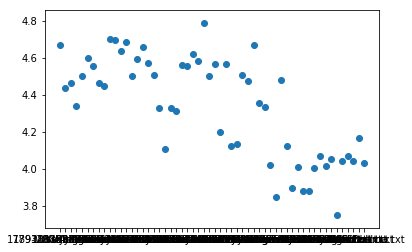

In [42]:
plt.scatter(names,presidents_avg)
plt.show()

Now we try to do the same thing for hapaxes.

In corpus linguistics, a hapax legomenon is a word that occurs only once within a context/speech.

No apparent pattern can be seen in the graph.

In [43]:
presidents_hapaxes=[]
for x in names:
    words=nltk.FreqDist(inaugural.words(fileids = x))
    presidents_hapaxes.append(len(words.hapaxes()))

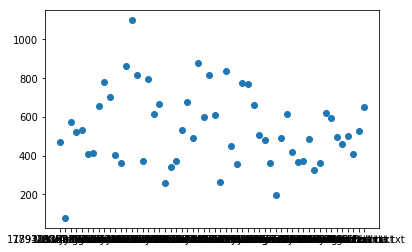

In [44]:
plt.scatter(names,presidents_hapaxes)
plt.show()

Now we start counting how many words were spoken by president xyz in one sentence.

We then take the average word count per sentence for each president and plot it.

A higher average word count per sentence would mean the president mostly used "big" sentences.

When we see the graph, we see that it has decreased over time.

In [47]:
def avgwordspersentence(words):
    counter=0
    avg=0
    noofsentences=0
    for i in words:
        if(i!='.'):#and i!=','
            counter=counter+1
        else:
            noofsentences+=1
            avg+=counter            
            counter=0
    avg=avg/noofsentences
    return avg

In [48]:
presidents_avg_words_per_sentence=[]
for x in names:
    words=inaugural.words(fileids = x)
    presidents_avg_words_per_sentence.append(avgwordspersentence(words))

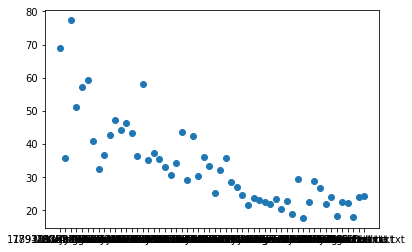

In [49]:
#without commas
plt.scatter(names,presidents_avg_words_per_sentence)
plt.show()

Finally we calculate the syllable per word used by each president in his speech, we use pyphen library for this as normally nouns like "Afghasnistan" have no predefined number of syllabes.

We then take the average syllable per word for each president and plot it.

When we see the graph, we see that it has decreased over time.

In [190]:
dic = pyphen.Pyphen(lang='en')
def noofsyllabes(corpus):
    num=0
    for x in corpus:
        s=dic.inserted(x)
        num=num+s.count('-')+1
    return num

In [191]:
presidents_avg=[]
for x in names:
    words=list(nltk.FreqDist(inaugural.words(fileids = x)))
    for s in stop_words:
        if s in words:
            words.remove(s)
    n=noofsyllabes(words)/len(words)
    print("Number of syllables for ",x, " is ",n)
    presidents_avg.append(n)

Number of syllables for  1789-Washington.txt  is  2.2942271880819365
Number of syllables for  1793-Washington.txt  is  2.278688524590164
Number of syllables for  1797-Adams.txt  is  2.3108665749656123
Number of syllables for  1801-Jefferson.txt  is  2.056179775280899
Number of syllables for  1805-Jefferson.txt  is  2.171388101983003
Number of syllables for  1809-Madison.txt  is  2.249448123620309
Number of syllables for  1813-Madison.txt  is  2.185745140388769
Number of syllables for  1817-Monroe.txt  is  2.2412698412698413
Number of syllables for  1821-Monroe.txt  is  2.2219343696027636
Number of syllables for  1825-Adams.txt  is  2.3373626373626375
Number of syllables for  1829-Jackson.txt  is  2.318485523385301
Number of syllables for  1833-Jackson.txt  is  2.2338902147971362
Number of syllables for  1837-VanBuren.txt  is  2.293388429752066
Number of syllables for  1841-Harrison.txt  is  2.292628024760833
Number of syllables for  1845-Polk.txt  is  2.2689486552567235
Number of sylla

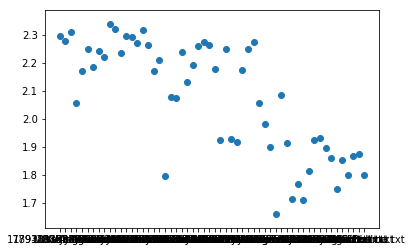

In [192]:
plt.scatter(names,presidents_avg)
plt.show()